In [8]:
import pandas as pd
import numpy as np
print("Code ran successfully!")

Code ran successfully!


In [6]:
file_path = "Desktop/Medical Insurance Project/Data/Medical_insurance.csv"
df=pd.read_csv(file_path)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
print("Rows and Columns:", df.shape)
print("\nColumn Names:", df.columns.tolist())

Rows and Columns: (2772, 7)

Column Names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [10]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age     sex     bmi  children smoker     region   charges
0   19  female  27.900         0    yes  southwest  16884.92
1   18    male  33.770         1     no  southeast   1725.55
2   28    male  33.000         3     no  southeast   4449.46
3   33    male  22.705         0     no  northwest  21984.47
4   32    male  28.880         0     no  northwest   3866.86


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369957
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768970
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.870000
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.800000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.015000
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.780000


In [46]:
for col in ['sex', 'smoker', 'region']: print(f"\nUnique values in {col}:", df[col].unique())


Unique values in sex: ['female' 'male']

Unique values in smoker: ['yes' 'no']

Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


In [47]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(1435)

In [49]:
duplicates = df[df.duplicated()]
print(duplicates)

      age     sex     bmi  children smoker     region   charges
581    19    male  30.590         0     no  northwest   1639.56
1338   23    male  34.400         0     no  southwest   1826.84
1339   56  female  39.820         0     no  southeast  11090.72
1340   27    male  42.130         0    yes  southeast  39611.76
1341   19    male  24.600         1     no  southwest   1837.24
...   ...     ...     ...       ...    ...        ...       ...
2767   47  female  45.320         1     no  southeast   8569.86
2768   21  female  34.600         0     no  southwest   2020.18
2769   19    male  26.030         1    yes  northwest  16450.89
2770   23    male  18.715         0     no  northwest  21595.38
2771   54    male  31.600         0     no  southwest   9850.43

[1435 rows x 7 columns]


In [50]:
df=df.drop_duplicates()
print('Remaining duplicates:', df.duplicated().sum())

Remaining duplicates: 0


In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [53]:
 print (df['children'].value_counts())
print(df['bmi'].describe())
print(df['age'].describe())
print(df['charges'].describe())

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count     1337.000000
mean     13279.121503
std      12110.359677
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: charges, dtype: float64


In [54]:
df.to_csv('Medical_insurance_cleaned.csv', index=False)

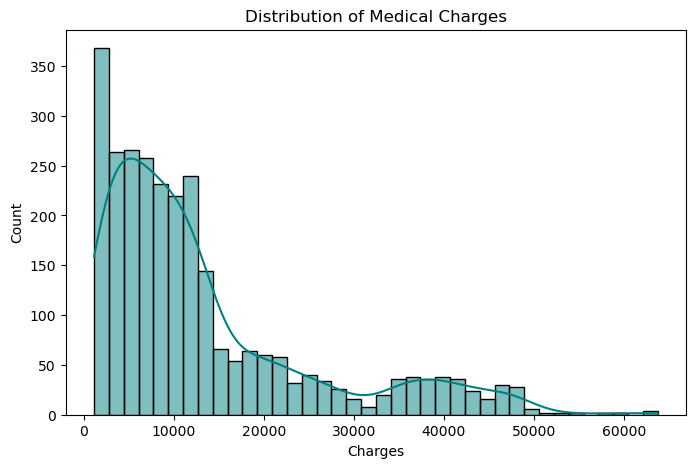

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True, color='teal')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

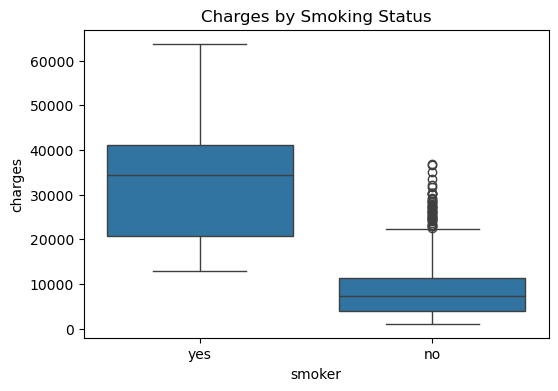

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()

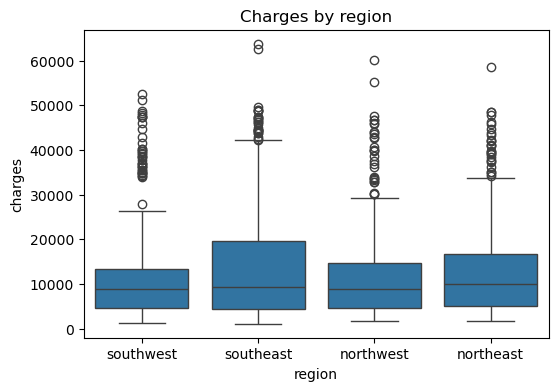

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by region')
plt.show()

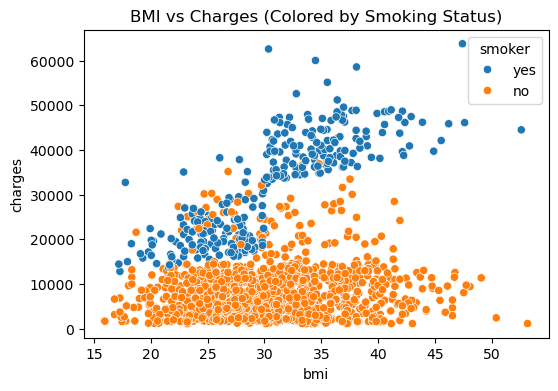

In [63]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges (Colored by Smoking Status)')
plt.show()

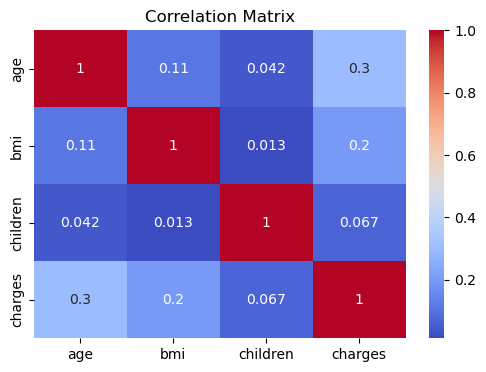

In [65]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
df.groupby('smoker')['charges'].mean()

smoker
no      8440.660310
yes    32050.231898
Name: charges, dtype: float64

In [56]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384599
northwest    12450.840648
southeast    14735.411484
southwest    12346.937508
Name: charges, dtype: float64

In [17]:
df.groupby('children')['charges'].mean()

children
0    12317.920843
1    12722.650446
2    15268.182782
3    15304.070679
4    13550.984231
5     8706.037143
Name: charges, dtype: float64

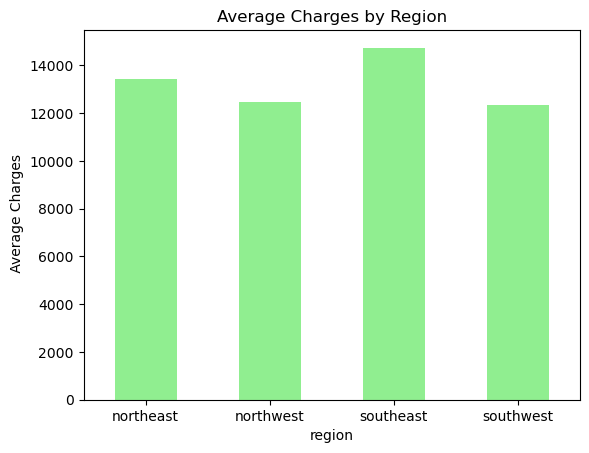

In [73]:
df.groupby('region')['charges'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Charges by Region')
plt.ylabel(' Average Charges')
plt.xticks(rotation=0)
plt.show()

In [88]:
print(df.columns.tolist())
print(df.head)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]>


In [89]:
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

In [95]:
for col in df.columns:
    if df[col].dtype == 'bool':
      df[col] = df[col].astype('int64') 
print(df.head)

<bound method NDFrame.head of       age     bmi  children  smoker      charges  sex_male  region_northwest  \
0      19  27.900         0       1  16884.92400         0                 0   
1      18  33.770         1       0   1725.55230         1                 0   
2      28  33.000         3       0   4449.46200         1                 0   
3      33  22.705         0       0  21984.47061         1                 1   
4      32  28.880         0       0   3866.85520         1                 1   
...   ...     ...       ...     ...          ...       ...               ...   
2767   47  45.320         1       0   8569.86180         0                 0   
2768   21  34.600         0       0   2020.17700         0                 0   
2769   19  26.030         1       1  16450.89470         1                 1   
2770   23  18.715         0       0  21595.38229         1                 1   
2771   54  31.600         0       0   9850.43200         1                 0   

      reg

In [93]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [94]:
print(df.dtypes)

age                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
sex_male              int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error
import numpy as np

In [108]:
X = df.drop('charges', axis=1)
y = df['charges']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

In [117]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))

MAE: 4160.25
MSE: 39933194.55
RMSE: 6319.27
R² Score: 0.7398


In [118]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
comparison_df.head(10)

,Actual,Predicted
1106,8988.15875,10382.195851
1321,28101.33305,36850.703702
2313,12032.32600,9010.642378
2274,1682.59700,5910.228930
1432,3393.35635,6661.467930
2240,24106.91255,34046.511579
965,4746.34400,5625.022446
2626,47269.85400,38993.948097
2134,8556.90700,11655.912549
2296,2639.04290,3366.188464
